In [14]:
import lvm_read
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import urllib
import datetime

# Showcase of the package ``lvm_read``

April 2023, J. Slavič (janko.slavic@fs.uni-lj.si, [ladisk.si/~slavic](http://ladisk.si/~slavic))

## Open the sample with ``lvm_read``

In [2]:
filename = 'short.lvm'
#filename = 'long_single_header_multi_ch.lvm'
#filename = 'long.lvm'
#filename = 'with_empty_fields.lvm'
#filename = 'multi_time_column.lvm'

In [6]:
#%%timeit -n1
lvm = lvm_read.read('./data/'+filename, read_from_pickle=False)

Header of the lvm file

In [13]:
lvm['file_header'].keys()

dict_keys(['Description', 'Multi_Headings', 'Operator', 'Project', 'Reader_Version', 'Separator', 'Decimal_Separator', 'Time_Pref', 'X_Columns', 'LabVIEW Measurement', 'Writer_Version', 'Date', 'Time'])

E.g.: time of measurement:

In [19]:
datetime.datetime.combine(lvm['file_header']['Date'], lvm['file_header']['Time']).ctime()

'Tue Feb 19 09:51:39 2013'

## Segment details

Segments are accessed by index

In [20]:
lvm['segments'][0]

{'Header': {'Notes': '',
  'Test_Name': '',
  'Test_Numbers': '',
  'Test_Series': '',
  'UUT_M/N': '',
  'UUT_Name': '',
  'UUT_S/N': '',
  'X_Dimension': ['Time', 'Time'],
  'X_Unit_Label': 'Default SI Unit',
  'Y_Dimension': 'Electric Potential',
  'Y_Unit_Label': ['Newtons', 'm/s^2'],
  'Channels': 2,
  'Samples': [10, 10],
  'Date': [datetime.date(2013, 2, 19), datetime.date(2013, 2, 19)],
  'Time': [datetime.time(9, 51, 40, 727189), datetime.time(9, 51, 40, 727189)],
  'X0': [0, 0],
  'Delta_X': [3.90625e-05, 3.90625e-05],
  'Columns': ['X_Value',
   'Excitation (Trigger)',
   'Response (Trigger)',
   'Comment'],
  'Y_Labels': ['Excitation (Trigger)', 'Response (Trigger)', 'Comment']},
 'Data': [[[0.0,
    3.90625e-05,
    7.8125e-05,
    0.0001171875,
    0.00015625,
    0.0001953125,
    0.000234375,
    0.0002734375,
    0.0003125,
    0.0003515625],
   [0.914018,
    0.537321,
    0.616905,
    0.895449,
    0.57446,
    0.516099,
    1.046658,
    0.39407,
    0.741586,
    

Each segment has its own header, data, and comments section

The headers of the segments look like:

In [24]:
lvm['segments'][0]['header']

{'Notes': '',
 'Test_Name': '',
 'Test_Numbers': '',
 'Test_Series': '',
 'UUT_M/N': '',
 'UUT_Name': '',
 'UUT_S/N': '',
 'X_Dimension': ['Time', 'Time'],
 'X_Unit_Label': 'Default SI Unit',
 'Y_Dimension': 'Electric Potential',
 'Y_Unit_Label': ['Newtons', 'm/s^2'],
 'Channels': 2,
 'Samples': [10, 10],
 'Date': [datetime.date(2013, 2, 19), datetime.date(2013, 2, 19)],
 'Time': [datetime.time(9, 51, 40, 727189), datetime.time(9, 51, 40, 727189)],
 'X0': [0, 0],
 'Delta_X': [3.90625e-05, 3.90625e-05],
 'Columns': ['X_Value',
  'Excitation (Trigger)',
  'Response (Trigger)',
  'Comment'],
 'Y_Labels': ['Excitation (Trigger)', 'Response (Trigger)', 'Comment']}

Each Y Column comes paired with its X column e.g.,

In [37]:
lvm['segments'][0]['data'][1]

[[0.0,
  3.90625e-05,
  7.8125e-05,
  0.0001171875,
  0.00015625,
  0.0001953125,
  0.000234375,
  0.0002734375,
  0.0003125,
  0.0003515625],
 [1.204792,
  1.208403,
  1.213915,
  1.212205,
  1.222088,
  1.218223,
  1.213408,
  1.221011,
  1.211888,
  1.212775]]

Plots can be generated via:

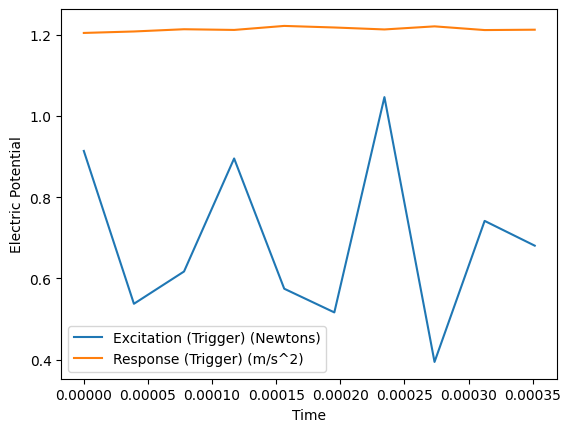

In [42]:
for seg in lvm['segments']:
    labels = [f"{l} ({u})" for l,u in zip(seg['Header']['Y_Labels'], seg['Header']['Y_Unit_Label'])]
    for ch, l in zip(seg['data'], labels):
        plt.plot(*ch, label=l)

    plt.legend()
    plt.xlabel(seg['Header']['X_Dimension'][0])
    plt.ylabel(seg['Header']['Y_Dimension'])
    plt.show()